In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mri_data import file_manager as fm
import helpers
from pathlib import Path
import os

from reload_recursive import reload_recursive

In [2]:
reload_recursive(helpers)

In [3]:
drive_root = fm.get_drive_root()
msmri_home = Path("/home/srs-9/Projects/ms_mri")
msmri_datadir = msmri_home / "data"
curr_dir = Path(os.getcwd())
data_dir = curr_dir / "data0"
showfigs = False

In [4]:
df, df_z, data, data_z = helpers.prepare_data(data_dir / "t1_data_full.csv")

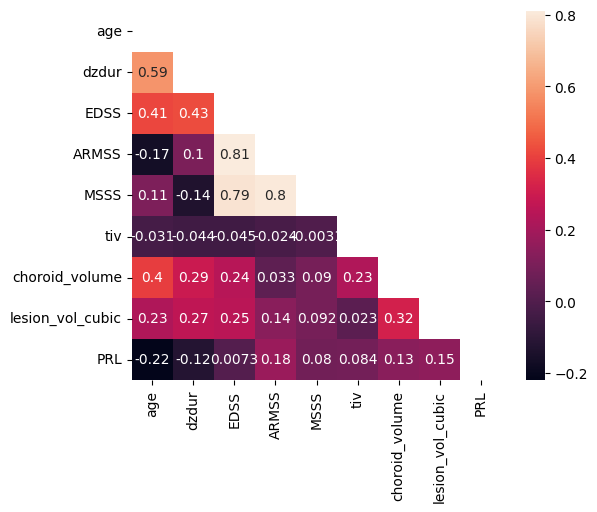

In [5]:
corr_vars = ["age", "dzdur", "EDSS", "ARMSS", "MSSS", "tiv", "choroid_volume", "lesion_vol_cubic", "PRL"]
corr = data_z[corr_vars].corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, square=True)
sns.set_theme(rc={'figure.figsize':(10,10)})

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_vars = ["age", "dzdur", "EDSS", "tiv", "choroid_volume", "lesion_vol_cubic", "PRL"]
vif_data = data_z[vif_vars].dropna()

vif = pd.DataFrame()
vif["feature"] = vif_data.columns
vif = vif.set_index("feature")
vif['VIF'] = [variance_inflation_factor(vif_data.values, i, )
                          for i in range(len(vif_data.columns))]

In [7]:
vif['VIF']

feature
age                 1.932275
dzdur               1.659854
EDSS                1.341942
tiv                 1.073669
choroid_volume      1.415498
lesion_vol_cubic    1.212435
PRL                 1.171628
Name: VIF, dtype: float64

Check t1_gd scans

In [12]:
df_full = pd.read_csv(data_dir / "t1_data_full.csv")
df_full = df_full.set_index("subid")
dataroot = drive_root / "3Tpioneer_bids"
gd_scans = []
for i, row in df_full.iterrows():
    if (dataroot / str(row['sub-ses']) / "t1_gd.nii.gz").is_file():
        gd_scans.append(i)

gd_scans.sort()
print(gd_scans)

[1001, 1002, 1003, 1011, 1016, 1017, 1020, 1021, 1022, 1023, 1024, 1026, 1030, 1033, 1036, 1038, 1039, 1042, 1044, 1045, 1047, 1049, 1053, 1054, 1061, 1062, 1063, 1064, 1065, 1066, 1070, 1071, 1074, 1079, 1080, 1082, 1083, 1089, 1094, 1098, 1101, 1103, 1105, 1108, 1109, 1111, 1112, 1113, 1115, 1117, 1119, 1121, 1122, 1124, 1125, 1126, 1128, 1130, 1131, 1133, 1135, 1136, 1138, 1141, 1142, 1144, 1145, 1148, 1150, 1152, 1155, 1156, 1157, 1158, 1165, 1167, 1169, 1170, 1171, 1172, 1175, 1176, 1182, 1183, 1186, 1191, 1200, 1201, 1207, 1208, 1211, 1215, 1216, 1219, 1220, 1223, 1224, 1225, 1226, 1228, 1229, 1232, 1234, 1235, 1238, 1239, 1240, 1241, 1242, 1246, 1247, 1248, 1251, 1254, 1256, 1257, 1260, 1262, 1264, 1267, 1268, 1270, 1271, 1272, 1278, 1279, 1280, 1282, 1283, 1285, 1290, 1292, 1293, 1298, 1300, 1301, 1304, 1307, 1308, 1309, 1311, 1312, 1313, 1315, 1317, 1318, 1319, 1320, 1321, 1322, 1326, 1327, 1328, 1329, 1332, 1334, 1335, 1338, 1340, 1341, 1343, 1353, 1354, 1355, 1356, 1357, 136